In [ ]:
# Install necessary libraries in Colab (only once)
!pip install scikit-image opencv-python matplotlib

# Import libraries
import cv2
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

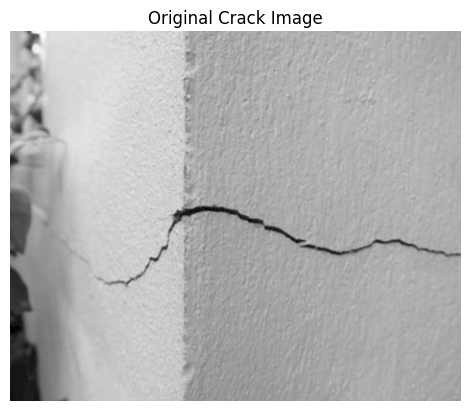

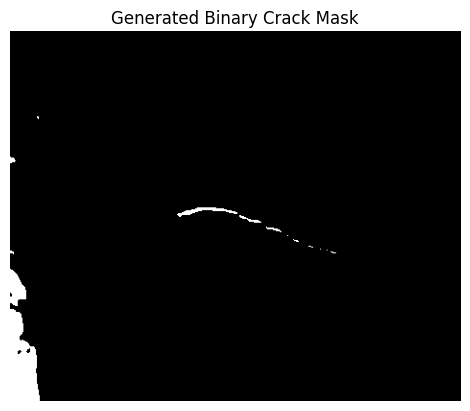

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
file_name="crack.png"
# Load the crack image in grayscale
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Crack Image')
plt.axis('off')
plt.show()

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply binary thresholding to create a mask
_, binary_mask = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY_INV)

# Show the generated binary mask
plt.imshow(binary_mask, cmap='gray')
plt.title('Generated Binary Crack Mask')
plt.axis('off')
plt.show()

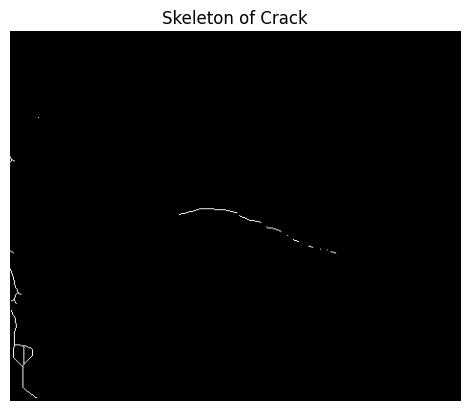

In [ ]:
from skimage.morphology import skeletonize

# Convert to binary (0 and 1)
binary = binary_mask > 0

# Skeletonize the binary mask
skeleton = skeletonize(binary)

# Display skeleton
plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton of Crack')
plt.axis('off')
plt.show()

In [ ]:
import math
# Distance transform from background to crack edges
dist_transform = cv2.distanceTransform((binary_mask).astype(np.uint8), cv2.DIST_L2, 5)

# Get coordinates of skeleton pixels
skeleton_coords = np.argwhere(skeleton)

# Calculate crack widths at skeleton points
widths = []

for y, x in skeleton_coords:
    width = dist_transform[y, x] * 2  # Multiply by 2 to get full width
    widths.append(width)
# Assumed camera parameters
distance_to_wall_m = 1.0  # Distance from drone to wall in meters
hfov_deg = 70  # Horizontal Field of View of camera in degrees
image_width_px = image.shape[1]  # Image width in pixels (e.g., 640px)

# Calculate physical width of FOV at given distance
fov_width_m = 2 * distance_to_wall_m * math.tan(math.radians(hfov_deg / 2))

# Calculate meters per pixel
meters_per_pixel = fov_width_m / image_width_px
print(f"Meters per pixel: {meters_per_pixel:.6f} m/pixel")

# Convert widths from pixels to meters
widths_meters = [w * meters_per_pixel for w in widths]

# Display sample widths in meters
print("Sample crack widths (in meters):", widths_meters[:10])

# Calculate average width in meters
avg_width_m = np.mean(widths_meters)
print(f"Average crack width: {avg_width_m:.6f} meters")

Meters per pixel: 0.002980 m/pixel
Sample crack widths (in meters): [np.float32(0.0059592132), np.float32(0.0059592132), np.float32(0.008342898), np.float32(0.0119184265), np.float32(0.01787764), np.float32(0.016685797), np.float32(0.013091795), np.float32(0.0119184265), np.float32(0.008342898), np.float32(0.0119184265)]
Average crack width: 0.028987 meters


In [ ]:
# Classify severity (based on real-world thresholds)
if avg_width_m <= 0.001:  # Fine: ≤ 1mm
    severity = 'Fine'
elif avg_width_m <= 0.003:  # Medium: >1mm and ≤3mm
    severity = 'Medium'
else:  # Wide: >3mm
    severity = 'Wide'

print(f" Crack Severity Classification: {severity}")

 Crack Severity Classification: Wide


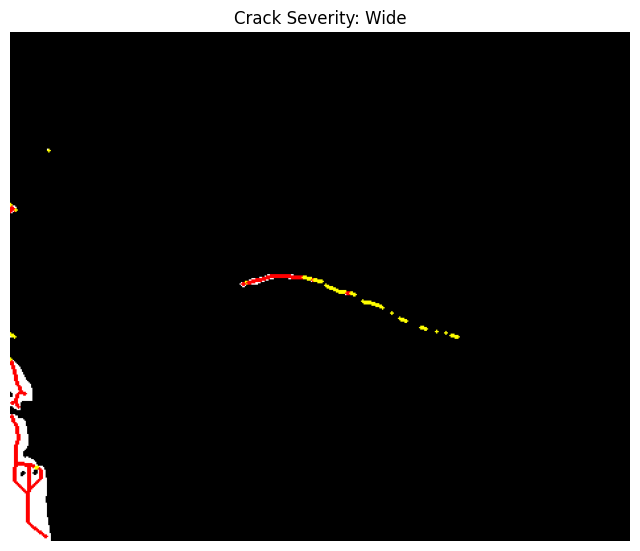

In [ ]:
# Convert binary mask to color image for visualization
vis_image = cv2.cvtColor((binary_mask).astype(np.uint8), cv2.COLOR_GRAY2BGR)

# Plot the severity color on skeleton points
for (y, x), width in zip(skeleton_coords, widths):
    if width > 3:
        color = (0, 0, 255)      # Red - Wide
    elif width > 1:
        color = (0, 255, 255)    # Yellow - Medium
    else:
        color = (0, 255, 0)      # Green - Fine
    cv2.circle(vis_image, (x, y), 1, color, -1)

# Show result
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(vis_image, cv2.COLOR_BGR2RGB))
plt.title(f"Crack Severity: {severity}")
plt.axis('off')
plt.show()

Ground Truth Mask uploaded: crack_gt.png


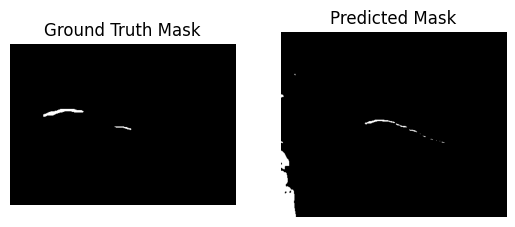

In [ ]:
# Upload ground truth mask

gt_file_name="crack_gt.png"
print("Ground Truth Mask uploaded:", gt_file_name)

# Load the ground truth mask in grayscale
ground_truth_mask = cv2.imread(gt_file_name, cv2.IMREAD_GRAYSCALE)

# Ensure binary masks: cracks as 1, background as 0
_, ground_truth_bin = cv2.threshold(ground_truth_mask, 127, 1, cv2.THRESH_BINARY)
_, predicted_bin = cv2.threshold(binary_mask, 127, 1, cv2.THRESH_BINARY)

# Show both masks for visual check
plt.subplot(1, 2, 1)
plt.imshow(ground_truth_bin, cmap='gray')
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(predicted_bin, cmap='gray')
plt.title('Predicted Mask')
plt.axis('off')

plt.show()

In [ ]:
print("Ground Truth Mask Shape:", ground_truth_bin.shape)
print("Predicted Mask Shape:", predicted_bin.shape)

Ground Truth Mask Shape: (268, 374)
Predicted Mask Shape: (386, 470)


In [ ]:
# Resize predicted mask to ground truth size
predicted_bin_resized = cv2.resize(predicted_bin.astype(np.uint8),
                                   (ground_truth_bin.shape[1], ground_truth_bin.shape[0]),
                                   interpolation=cv2.INTER_NEAREST)

In [ ]:
print("Ground Truth Mask Shape:", ground_truth_bin.shape)
print("Resized Predicted Mask Shape:", predicted_bin_resized.shape)

Ground Truth Mask Shape: (268, 374)
Resized Predicted Mask Shape: (268, 374)


In [ ]:
gt_flat = ground_truth_bin.flatten()
pred_flat = predicted_bin_resized.flatten()

print(f"Ground Truth Flattened Length: {len(gt_flat)}")
print(f"Predicted Flattened Length: {len(pred_flat)}")

# ✅ Now both lengths should be exactly the same!

Ground Truth Flattened Length: 100232
Predicted Flattened Length: 100232


In [ ]:
import numpy as np
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 👇 Replace with your actual loaded images!
# Example placeholders
# ground_truth_bin = cv2.imread('ground_truth.png', cv2.IMREAD_GRAYSCALE)
# predicted_bin = cv2.imread('predicted.png', cv2.IMREAD_GRAYSCALE)

# ✅ Ensure both are numpy arrays of type uint8
ground_truth_bin = ground_truth_bin.astype(np.uint8)
predicted_bin = predicted_bin.astype(np.uint8)

# ✅ Resize predicted to ground truth shape if needed
if ground_truth_bin.shape != predicted_bin.shape:
    print("Resizing predicted mask to match ground truth...")
    predicted_bin = cv2.resize(predicted_bin,
                               (ground_truth_bin.shape[1], ground_truth_bin.shape[0]),
                               interpolation=cv2.INTER_NEAREST)

# ✅ Binarize masks (safe thresholding)
_, ground_truth_bin = cv2.threshold(ground_truth_bin, 127, 1, cv2.THRESH_BINARY)
_, predicted_bin = cv2.threshold(predicted_bin, 127, 1, cv2.THRESH_BINARY)

# ✅ Confirm final shapes
print("Ground Truth Mask Shape:", ground_truth_bin.shape)
print("Predicted Mask Shape:", predicted_bin.shape)

# ✅ Flatten masks
gt_flat = ground_truth_bin.flatten()
pred_flat = predicted_bin.flatten()

# ✅ Confirm lengths match
print("Ground Truth Flattened Length:", len(gt_flat))
print("Predicted Flattened Length:", len(pred_flat))

# ✅ If lengths don't match, STOP and debug
if len(gt_flat) != len(pred_flat):
    raise ValueError("Flattened masks have different lengths! Fix shapes first.")

# ✅ Calculate metrics
accuracy = accuracy_score(gt_flat, pred_flat)
precision = precision_score(gt_flat, pred_flat, zero_division=0)
recall = recall_score(gt_flat, pred_flat, zero_division=0)
f1 = f1_score(gt_flat, pred_flat, zero_division=0)

# ✅ IoU calculation
intersection = np.logical_and(ground_truth_bin, predicted_bin)
union = np.logical_or(ground_truth_bin, predicted_bin)
iou = np.sum(intersection) / (np.sum(union) + 1e-6)

# ✅ Display results
print("\n✅ Segmentation Metrics ✅")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"IoU      : {iou:.4f}")

Ground Truth Mask Shape: (268, 374)
Predicted Mask Shape: (268, 374)
Ground Truth Flattened Length: 100232
Predicted Flattened Length: 100232

✅ Segmentation Metrics ✅
Accuracy : 0.9010
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000
IoU      : 0.0000
